In [94]:
import pandas as pd
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [45]:
manualWords1File = '/vol/tensusers2/wharmsen/SERDA-annotations/round1_words_jan/ASTLA_word_correctness_annotations_janneke_2023.09.24_words1.csv'
manualWords2File = '/vol/tensusers2/wharmsen/SERDA-annotations/round1_words_jan/ASTLA_word_correctness_annotations_janneke_2023.09.24_words2.csv'
manualWords3File = '/vol/tensusers2/wharmsen/SERDA-annotations/round1_words_jan/ASTLA_word_correctness_annotations_janneke_2023.09.24_words3.csv'

manualWords1 = pd.read_csv(manualWords1File, index_col=0).to_numpy().flatten()
manualWords2 = pd.read_csv(manualWords2File, index_col=0).to_numpy().flatten()
manualWords3 = pd.read_csv(manualWords3File, index_col=0).to_numpy().flatten()

In [46]:
asrWords1File = '/vol/tensusers2/wharmsen/diagnostics_SERDA/study2.1/output-for-max/word-level-accuracy-timing/words_1-accuracy.csv'
asrWords2File = '/vol/tensusers2/wharmsen/diagnostics_SERDA/study2.1/output-for-max/word-level-accuracy-timing/words_2-accuracy.csv'
asrWords3File = '/vol/tensusers2/wharmsen/diagnostics_SERDA/study2.1/output-for-max/word-level-accuracy-timing/words_3-accuracy.csv'

asrWords1 = pd.read_csv(asrWords1File, index_col=0).to_numpy().flatten()
asrWords2 = pd.read_csv(asrWords2File, index_col=0).to_numpy().flatten()
asrWords3 = pd.read_csv(asrWords3File, index_col=0).to_numpy().flatten()


In [119]:
mw1 = pd.read_csv(manualWords1File, index_col=0).dropna()
aw1 = pd.read_csv(asrWords1File, index_col=0).loc[list(mw1.index),:]

for (name, e1, e2) in zip(list(mw1.index), mw1.to_numpy(), aw1.to_numpy()):
    print(name, 'MCC = ', matthews_corrcoef(e1, e2))

2RRDV MCC =  0.14921114116371084
2RWNQ MCC =  0.008171505630757667
2W45J MCC =  -0.018377261547332376
33JNC MCC =  -0.0842151921066519
3MGQC MCC =  0.0
3PBFH MCC =  0.0
4JDM4 MCC =  0.0
4KCW4 MCC =  0.07935196008581541
4MD4Y MCC =  0.2173376208541448
4QX3R MCC =  0.08467842548054559
4SJSC MCC =  0.024673188560991335
54TTZ MCC =  0.131851172427271
5B2ZB MCC =  0.131851172427271
5C2HJ MCC =  0.0
5DT2P MCC =  0.26296185307038883
5FHDQ MCC =  0.2342606428329091
5HMXC MCC =  0.16666666666666666
5HVDT MCC =  0.32732683535398854
5M3XR MCC =  0.16116459280507606
5NFJG MCC =  0.12309149097933274
5NMJH MCC =  0.1486904285332952
5PTZK MCC =  0.31917252681128727
5XVWF MCC =  0.3333333333333333


['eb',
 'veer',
 'eend',
 'boor',
 'pech',
 'eng',
 'lab',
 'geur',
 'lach',
 'bord',
 'web',
 'pink',
 'duw',
 'muts',
 'jurk',
 'sprei',
 'kist',
 'geld',
 'kieuw',
 'tent',
 'boei',
 'schuw',
 'bank',
 'hooi',
 'leeuw',
 'taart',
 'kaars',
 'kalf',
 'punt',
 'haai',
 'ring',
 'vonk',
 'draai',
 'fiets',
 'glas',
 'beest',
 'helft',
 'kaart',
 'groei',
 'laars',
 'winst',
 'krab',
 'vlieg',
 'droom',
 'draak',
 'kwart',
 'spons',
 'krijt',
 'snoep',
 'traan']

In [102]:
def removeNANvalues(manualArray, asrArray):
    print("Nr values with NAN:", len(manualArray), len(asrArray))
    manualArrayClean = []
    asrArrayClean = []
    for (e1, e2) in zip(manualArray, asrArray):
        if not np.isnan(e1) and not np.isnan(e2):
            manualArrayClean.append(int(e1))
            asrArrayClean.append(int(e2))
    print("Nr values without NAN:", len(manualArrayClean), len(asrArrayClean))
    return manualArrayClean, asrArrayClean

Nr values with NAN: 9850 9850
Nr values without NAN: 1150 1150
MCC = 0.013137702626145078
[[ 49  30]
 [637 434]]


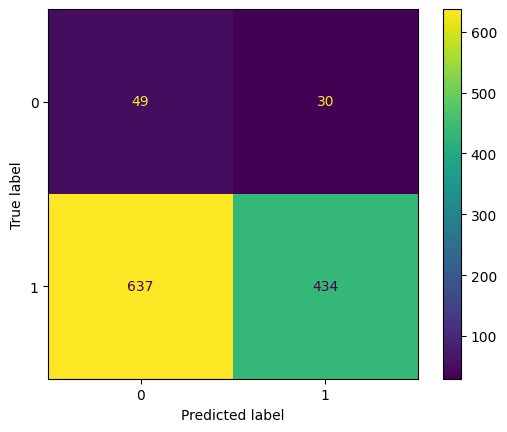

In [101]:
manualWords1Clean, asrWords1Clean = removeNANvalues(manualWords1, asrWords1)
mcc = matthews_corrcoef(manualWords1Clean, asrWords1Clean)
cm = confusion_matrix(manualWords1Clean, asrWords1Clean)
print('MCC =', mcc)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [51]:
manualWords2Clean, asrWords2Clean = removeNANvalues(manualWords2, asrWords2)
matthews_corrcoef(manualWords2Clean, asrWords2Clean)

Nr values with NAN: 9850 9850
Nr values without NAN: 1150 1150


-0.02791921700507993

In [52]:
manualWords3Clean, asrWords3Clean = removeNANvalues(manualWords3, asrWords3)
matthews_corrcoef(manualWords3Clean, asrWords3Clean)

Nr values with NAN: 9850 9850
Nr values without NAN: 1100 1100


0.013415799968729563